<a href="https://colab.research.google.com/github/dhruvph/ANLY530/blob/main/ANLY530_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANLY530- Laboratory #1 Classification


## Method 1 Tree Based Classification


### Step 1: Collecting the data

In [2]:
import pandas as pd
# Mounting the gdrive
from google.colab import drive
drive.mount('/content/drive')

input_file = "drive/My Drive/Colab Notebooks/credit.csv"
credit = pd.read_csv(input_file)

credit.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [3]:
credit.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


### Step 2: Exploring the data

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

In [5]:
target = credit['Creditability']

target.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

Split data into training and test sets

#### Method 1:

In [6]:
# Generate random numbers
import random
random.seed(12345)
indx = random.sample(range(0, 1000), 1000)
credit_rand = credit.iloc[indx]
target_rand = target.iloc[indx]

credit_rand.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
426,1,2,39,3,6,11760,2,4,2,3,1,3,4,32,3,1,1,3,1,2,1
750,1,2,36,3,0,2862,2,5,4,3,1,3,4,30,3,3,1,3,1,1,1
10,1,1,11,4,0,3905,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
839,0,4,12,2,0,1386,3,3,2,2,1,2,2,26,3,2,1,3,1,1,1
845,0,2,27,4,3,2520,3,3,4,3,1,2,2,23,3,2,2,2,1,1,1


In [7]:
credit_rand.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


Compare this result to what we had earlier.
- The results are the same as previous.

In [8]:
credit_train = credit_rand.iloc[0:700]
credit_test = credit_rand.iloc[700:1000]
target_train = target_rand.iloc[0:700]
target_test = target_rand.iloc[700:1000]

print(target_train.value_counts()/700)
print(target_test.value_counts()/300)

1    0.691429
0    0.308571
Name: Creditability, dtype: float64
1    0.72
0    0.28
Name: Creditability, dtype: float64


#### Method 2:

In [9]:
# Method 2 of splitting the model
from sklearn.model_selection import train_test_split

y = target
X = credit.drop(['Creditability'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)


### Step 3: Training a model on the data

In [ ]:
# Design decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# Visualize the model

from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(model, out_file=None
, feature_names=X.columns, class_names=['default', 'no default']
, filled = True))
display(SVG(graph.pipe(format='svg')))

# tree.export_text(model) # text_representation of model

### Step 4: Evaluating Model Performance


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

[[ 41  43]
 [ 54 162]]
67.66666666666666


### Question 1
**If you see the accuracy 0f 100%, what does it mean? Does this mean that we design a perfect model? This is some thing that needs more discussion. Write a few sentences about accuracy of 100%.**  
**Answer:**  ?????????????????????????????????????????????????

## Method #2. Random forest

In [12]:
# Part 2 Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

[[ 38  46]
 [ 29 187]]
75.0


### Question 2 
**What are the three most important features in this model.**  
**Answer:**  ?????????????????????????????????????????????????

In [13]:
random.seed(23458) #Now, Change the random seed to 23458 and find the new accuracy of random forest.
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

[[ 36  48]
 [ 26 190]]
75.33333333333333


## Method #3. Adding regression to trees



### Step 1: Collecting the Data

In [14]:
input_file = "drive/My Drive/Colab Notebooks/whitewines.csv"
wine = pd.read_csv(input_file)
wine.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.62,0.24,1.10,0.039,6.0,62.0,0.99340,3.41,0.32,10.400000,5
1,5.7,0.22,0.20,16.00,0.044,41.0,113.0,0.99862,3.22,0.46,8.900000,6
2,5.9,0.19,0.26,7.40,0.034,33.0,123.0,0.99500,3.49,0.42,10.100000,6
3,5.3,0.47,0.10,1.30,0.036,11.0,74.0,0.99082,3.48,0.54,11.200000,4
4,6.4,0.29,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,6


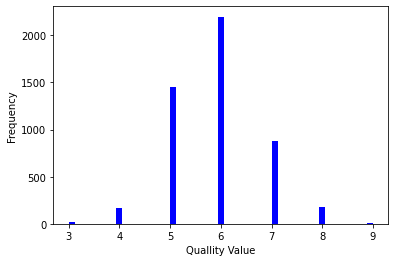

In [15]:
# Plot the target variable
import matplotlib.pyplot as plt
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=wine['quality'], bins='auto', color='b', )
plt.xlabel('Quallity Value')
plt.ylabel('Frequency')
plt.show()


### Step 2: Exploring and Preparing the Data

In [16]:
y = wine['quality']
X = wine.drop(['quality'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)


model = tree. DecisionTreeClassifier()
model = model.fit(X_train, y_train)

from sklearn.tree import export_graphviz


# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(model, out_file ='drive/My Drive/Colab Notebooks/tree.dot', feature_names =X.columns) 

dot_data = tree.export_graphviz(model
                                , out_file=None
                                , feature_names=X.columns
                                ,  filled=True, rounded=True
                                , special_characters=True)

graph = Source(dot_data)
graph

In [17]:
### Step 4: Evaluating Model Performance

In [18]:
y_predict = model.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

import numpy as np

np.corrcoef(y_test,y_predict)


[[  0   3   2   0   1   0   0]
 [  0   8  17  12   1   1   0]
 [  2  14 259 136  17   5   0]
 [  7  14 131 422  67  19   1]
 [  0   1  29  78 151  12   2]
 [  1   0   1  16  19  20   0]
 [  0   0   0   1   0   0   0]]
58.50340136054422


array([[1.        , 0.50945264],
       [0.50945264, 1.        ]])

### Question 3
**What is your interpretation about this amount of RMSE?**  
**Answer:**

## Method #4. News Popularity

### Step 1: Collecting the Data

In [25]:
filelocation = 'drive/My Drive/Colab Notebooks/OnlineNewsPopularity_for_python.csv'
news = pd.read_csv(filelocation)

news.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Step 2: Pre-processing

In [26]:
# handle goal attrubte to binary
popular = news.shares >= 1400
unpopular = news.shares < 1400
news.loc[popular,'shares'] = 1
news.loc[unpopular,'shares'] = 0

### Step 3: Modeling and evaluation

#### Train Model - Decision Tree

In [35]:
y = news['shares']
X = news.drop(['shares', 'url'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=52)


model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(X_train, y_train)

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
# export_graphviz(model, out_file ='drive/My Drive/Colab Notebooks/tree.dot', feature_names =X.columns) 

y_predict = model_tree.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

[[3075 2439]
 [2559 3821]]
57.97881284681352


#### Train Model - Random Forest

In [37]:
model_forest = RandomForestClassifier()
model_forest = model_forest.fit(X_train, y_train)

y_predict = model_forest.predict(X_test)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict)*100)

[[3270 2244]
 [1763 4617]]
66.31074491340172


#### Compare Models

DT: 0.583243 (0.004456)
RF: 0.664793 (0.005560)


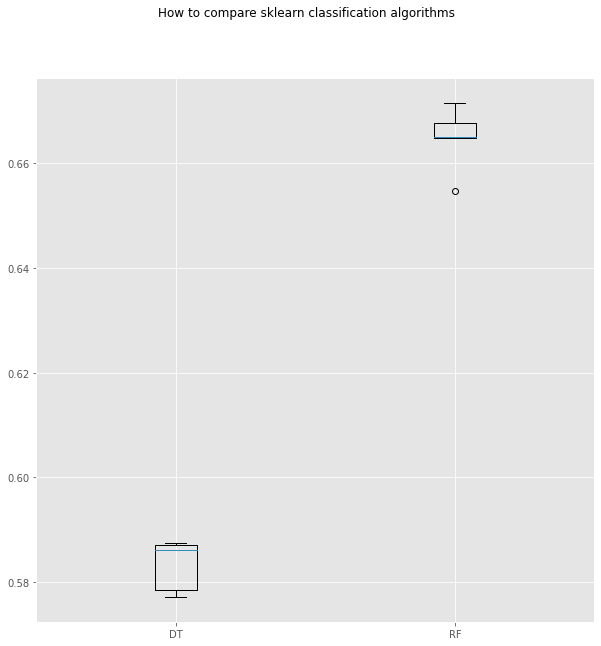

In [44]:
    # loading libraries
    import matplotlib.pyplot as plt
    from sklearn import model_selection

    plt.style.use('ggplot')
        
    # preparing models
    models = []
    models.append(('DT', tree.DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))

  
    # evaluating each model
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
         cv_results = model_selection.cross_val_score(model, X_train, y_train, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)
        
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('How to compare sklearn classification algorithms')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()